# Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='white')
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

# Reading data

In [2]:
drugs = pd.read_csv("/home/gustavo/github/mestrado/reworks/data/fda_approved_rdkit.csv", low_memory=False)
print(drugs.shape)
drugs.head()

(1895, 222)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Separating Explanatory and Response Variables

In [3]:
# Removing non explanatory variables

flag_columns = [
    'name',
    'chembl_id',
    'clean_smiles',
    'first_approval_year',
    'indication_class',
    'molecule_type',
    'withdrawn_flag',
    'therapeutic_flag',
    'polymer_flag',
    'inorganic_flag',
    'natural_product_flag',
    'parenteral',
    'topical',
    'oral'
]

drugs_features = drugs.drop(labels=flag_columns, axis =1)
print(drugs_features.shape)
drugs_features.head()

(1895, 208)


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.055556,-0.333333,6.055556,0.333333,0.242956,59.072,54.032,59.048347,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.451389,-0.439815,9.451389,0.439815,0.301333,75.067,70.027,75.032028,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.229167,-0.939815,9.229167,0.939815,0.256644,76.055,72.023,76.027277,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.951389,0.683642,4.951389,0.683642,0.419021,77.152,70.096,77.029920,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.555556,-0.611111,9.555556,0.611111,0.373753,78.136,72.088,78.013936,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
response_variables = drugs[flag_columns]
print(response_variables.shape)
response_variables.head()

(1895, 14)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,natural_product_flag,parenteral,topical,oral
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,False,False,False,True
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,False,False,False,True
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,False,False,False,True
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,False,False,True,True
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,False,True,False,False


In [5]:
explanatory_variables = drugs_features.copy()
explanatory_variables.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.055556,-0.333333,6.055556,0.333333,0.242956,59.072,54.032,59.048347,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.451389,-0.439815,9.451389,0.439815,0.301333,75.067,70.027,75.032028,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.229167,-0.939815,9.229167,0.939815,0.256644,76.055,72.023,76.027277,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.951389,0.683642,4.951389,0.683642,0.419021,77.152,70.096,77.029920,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.555556,-0.611111,9.555556,0.611111,0.373753,78.136,72.088,78.013936,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Investigation of variables types, NA

Checking each column type, we can see that everthing is already on `float` type.

In [6]:
explanatory_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Columns: 208 entries, MaxEStateIndex to fr_urea
dtypes: float64(208)
memory usage: 3.0 MB


## NA Values

<Axes: >

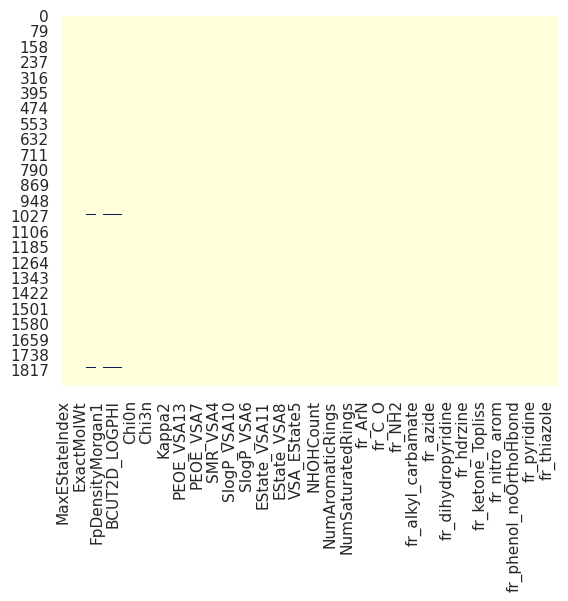

In [7]:
sns.heatmap(explanatory_variables.isna(), cmap='YlGnBu', cbar=False)

In [8]:
print(f"In fact, there are {explanatory_variables.isna().sum().sum()} NaN values")
print(f"We have {explanatory_variables[explanatory_variables.isna().any(axis=1)].shape[0]} rows that have at least one NaN Value")

In fact, there are 108 NaN values
We have 9 rows that have at least one NaN Value


In [9]:
response_variables.iloc[explanatory_variables[explanatory_variables.isna().any(axis=1)].index][['clean_smiles', 'name']]

,clean_smiles,name
491,CC(=O)Nc1cc([As](=O)(O)O)ccc1O,ACETARSONE
1015,O=C1O[Bi](O)Oc2ccccc21,BISMUTH SUBSALICYLATE
1131,CC[Hg]Sc1ccccc1C(=O)O,THIMEROSAL
1176,OC[C@H]1O[C@H](S[Au])[C@H](O)[C@@H](O)[C@@H]1O,AUROTHIOGLUCOSE
1193,O=C(O)c1cc(O)c2c(c1)O[Bi](O)O2,BISMUTH SUBGALLATE
1551,COC(CNC(=O)c1ccccc1OCC(=O)O)C[Hg]O,MERSALYL
1799,O=C(O)[C@@H]1O[Sb]2(O)(O[Sb]34(O)O[C@H]([C@H](...,SODIUM STIBOGLUCONATE
1809,O=C(O)c1ccccc1-c1c2cc(Br)c(=O)cc-2oc2c([Hg]O)c...,MERBROMIN
1873,O=S(=O)(O[Hg]c1ccccc1)c1cc2ccccc2cc1Cc1cc2cccc...,HYDRARGAPHEN


Mostly are transition metals. We can investigate how many have Hg.

In [10]:
response_variables.loc[response_variables['clean_smiles'].str.contains('Hg')]

,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,natural_product_flag,parenteral,topical,oral
1131,THIMEROSAL,CHEMBL508338,CC[Hg]Sc1ccccc1C(=O)O,1927.0,Preservative,Small molecule,False,True,False,False,False,False,False,False
1551,MERSALYL,CHEMBL1200943,COC(CNC(=O)c1ccccc1OCC(=O)O)C[Hg]O,not found,NaN,Small molecule,False,True,False,False,False,True,False,False
1809,MERBROMIN,CHEMBL3833381,O=C(O)c1ccccc1-c1c2cc(Br)c(=O)cc-2oc2c([Hg]O)c...,not found,NaN,Small molecule,False,True,False,False,False,False,False,False
1873,HYDRARGAPHEN,CHEMBL3833364,O=S(=O)(O[Hg]c1ccccc1)c1cc2ccccc2cc1Cc1cc2cccc...,not found,NaN,Small molecule,False,True,False,False,False,False,False,False


# Zero variance filter

In [11]:
def get_non_zero_var(data):
    selector = VarianceThreshold()
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [12]:
explanatory_variables_filter_var = get_non_zero_var(explanatory_variables)
explanatory_variables_filter_var

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.055556,-0.333333,6.055556,0.333333,0.242956,59.072,54.032,59.048347,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.451389,-0.439815,9.451389,0.439815,0.301333,75.067,70.027,75.032028,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.229167,-0.939815,9.229167,0.939815,0.256644,76.055,72.023,76.027277,30.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.951389,0.683642,4.951389,0.683642,0.419021,77.152,70.096,77.029920,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.555556,-0.611111,9.555556,0.611111,0.373753,78.136,72.088,78.013936,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,15.180875,-2.200064,15.180875,0.005252,0.015026,1415.576,1330.904,1414.518432,532.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
1891,16.017214,-2.345198,16.017214,0.097531,0.074348,1449.271,1373.671,1447.430200,542.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1892,14.914746,-4.773796,14.914746,0.084722,0.019898,1639.937,1529.057,1638.627902,620.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
1893,16.334985,-4.846154,16.334985,0.122580,0.023203,1755.658,1648.810,1753.637429,662.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0


# Remove Highly Correlated Features

In [13]:
def remove_high_corr(df, corr_threshold):

    corr_matrix = df.corr().abs()
    
    # Selecting only upper triangle of correlation matrix
    corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    remove = []

    for col in corr_matrix.columns:
        if any(corr_matrix[col] > corr_threshold):
            remove.append(col)
    
    print(f"Number of features removed: {len(remove)}")
    return df.drop(remove, axis =1)


Before removing highly correlated features

<Axes: >

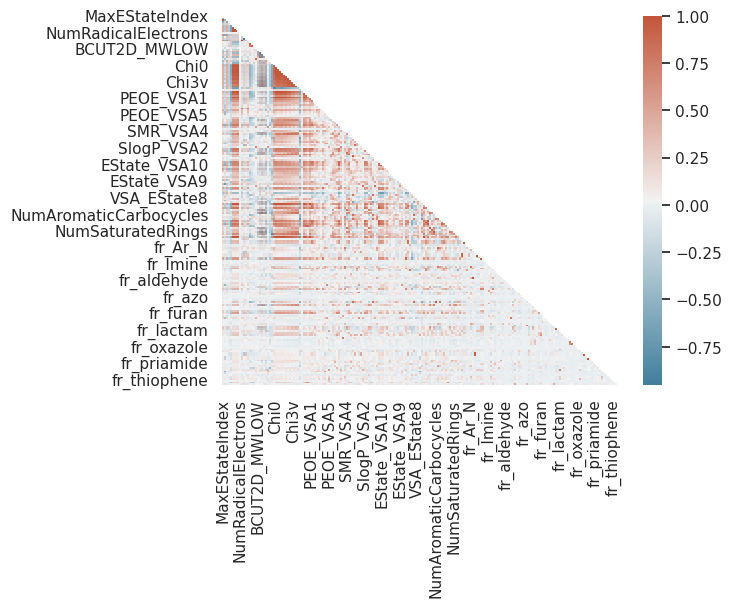

In [14]:
corr = explanatory_variables_filter_var.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap)

In [15]:
explanatory_variables_no_high_corr = remove_high_corr(explanatory_variables_filter_var, 0.9)
print(explanatory_variables_no_high_corr.shape)
explanatory_variables_no_high_corr


Number of features removed: 42
(1895, 159)


,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.055556,-0.333333,0.333333,0.242956,59.072,0.0,0.182528,-0.370334,1.500000,14.880242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.451389,-0.439815,0.439815,0.301333,75.067,0.0,0.239711,-0.288644,2.000000,16.466627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.229167,-0.939815,0.939815,0.256644,76.055,0.0,0.335391,-0.349891,2.000000,16.470004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.951389,0.683642,0.683642,0.419021,77.152,0.0,0.002549,-0.329661,1.750000,32.116866,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.555556,-0.611111,0.611111,0.373753,78.136,0.0,0.094572,-0.616764,1.500000,32.227566,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,15.180875,-2.200064,0.005252,0.015026,1415.576,0.0,0.404462,-0.440526,0.781250,32.215669,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
1891,16.017214,-2.345198,0.097531,0.074348,1449.271,0.0,0.330441,-0.507810,0.712871,35.496793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1892,14.914746,-4.773796,0.084722,0.019898,1639.937,0.0,0.277584,-0.390717,0.439252,32.245505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
1893,16.334985,-4.846154,0.122580,0.023203,1755.658,0.0,0.338729,-0.507466,0.694215,35.496796,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0


<Axes: >

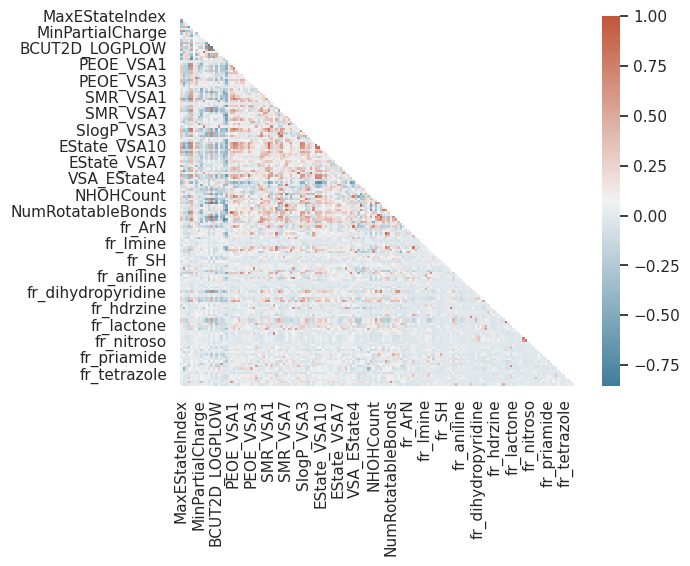

In [16]:
d = explanatory_variables_no_high_corr.corr()
mask = np.triu(np.ones_like(d, dtype=bool))
sns.heatmap(d, mask=mask, cmap=cmap, vmax = 1)

# Fill NA with zeros

<Axes: >

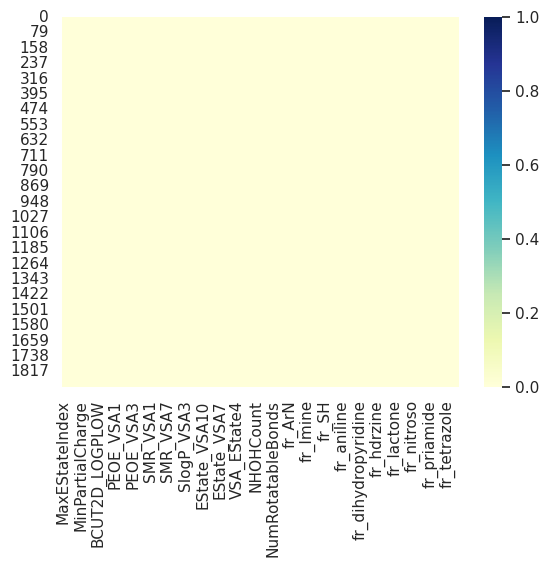

In [17]:
sns.heatmap(explanatory_variables_no_high_corr.isna(), cmap='YlGnBu')

In [18]:
print(f"Number of NaN Values {explanatory_variables_no_high_corr.isna().sum().sum()}")

Number of NaN Values 90


In [19]:
explanatory_variables_no_high_corr = explanatory_variables_no_high_corr.fillna(0)
print(f"Number of NaN values after filling with zeros {explanatory_variables_no_high_corr.isna().sum().sum()}")

Number of NaN values after filling with zeros 0


<Axes: >

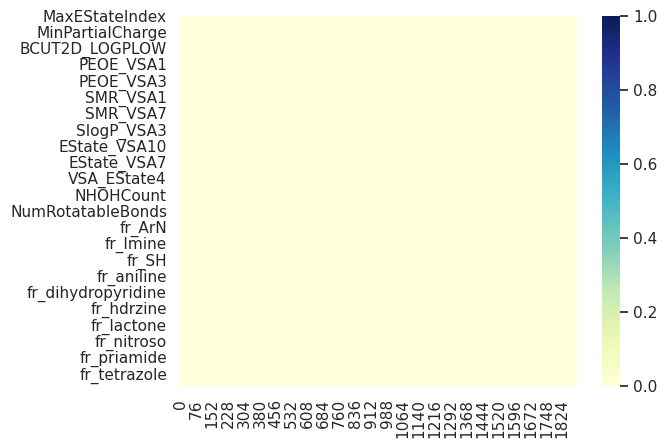

In [20]:
sns.heatmap(explanatory_variables_no_high_corr.isna().transpose(), cmap='YlGnBu', vmin=0, vmax=1)

# Re-join response and explanatory variables

In [21]:
drugs_processed = pd.concat([response_variables, explanatory_variables_no_high_corr], axis=1)
print(drugs_processed.shape)
drugs_processed

(1895, 173)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,BLEOMYCIN,CHEMBL403664,Cc1c(N)nc([C@H](CC(N)=O)NC[C@H](N)C(N)=O)nc1C(...,1973,BLEOMYCIN SULFATE,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
1891,VANCOMYCIN,CHEMBL262777,CN[C@H](CC(C)C)C(=O)N[C@H]1C(=O)N[C@@H](CC(N)=...,1964,VANCOMYCIN HYDROCHLORIDE,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1892,COLISTIMETHATE SODIUM,CHEMBL1201441,CCC(C)CCCCC(=O)NC(CCNCS(=O)(=O)O)C(=O)NC(C(=O)...,1970.0,Antibacterial,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
1893,TELAVANCIN,CHEMBL507870,CCCCCCCCCCNCCN[C@@]1(C)C[C@H](O[C@H]2[C@H](Oc3...,2009,TELAVANCIN HYDROCHLORIDE,Small molecule,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0


Number of NaN values in final preprocessed: 445
Number fo NaN values in final explanatory matrix 0


<Axes: >

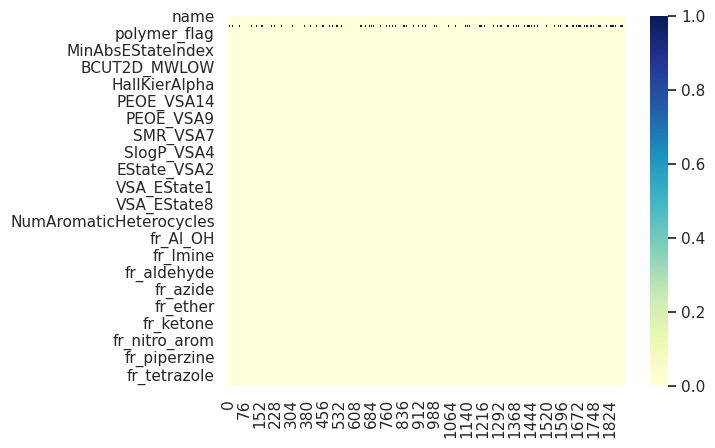

In [22]:
print(f"Number of NaN values in final preprocessed: {drugs_processed.isna().sum().sum()}")
print(f"Number fo NaN values in final explanatory matrix {drugs_processed[explanatory_variables_no_high_corr.columns].isna().sum().sum()}")
sns.heatmap(drugs_processed.isna().transpose(), cmap='YlGnBu')

# Saving

In [23]:
drugs_processed.to_csv("/home/gustavo/github/mestrado/reworks/models/oral_vs_non_oral/data/fda_rdkit_preprocessed.csv")